# **Práctica 7: Pronóstico con Regresión lineal múltiple**
**Enfoque de aprendizaje supervisado**

Nombre: Casasola García Oscar

No. Cuenta: 316123747

Email: oscar.casasola.g7@gmail.com

# Objetivo 
Obtener el pronóstico de la saturación de aceite remanente (ROS, Residual Oil Saturation) a partir de las cuatro mediciones de los registros geofísicos convencionales: (RC1) Registro Neutrón, (RC2) Registro Sónico, (RC3) Registro Densidad-Neutrón, y (RC4) Registro Densidad Corregido por Arcilla.

# Fuente de datos
Se tienen mediciones de registros geofísicos convencionales: RC1 (Registro Neutrón), RC2 (Registro Sónico), RC3 (Registro Densidad-Neutrón) y RC4 (Registro Densidad -corregido por arcilla-)

- Para la toma de registros se cuenta con cables electromecánicos, sensores, dispositivos eléctricos y sistemas computarizados.
- Se procesan los datos a través de los sensores, para luego ser enviados a la superficie por medio del cable.

* RC1 = Registro Neutrón
* RC2 = Registro Sónico
* RC3 = Registro Densidad-Neutrón
* RC4 = Registro Densidad (corregido por arcilla)


# 1) Importar las bibliotecas y los datos 

In [2]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline 

In [3]:
# Si se usa Google Colab
#from google.colab import files
#files.upload() 

#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
RGeofisicos = pd.read_csv("RGeofisicos.csv")
RGeofisicos

,Profundidad,RC1,RC2,RC3,RC4
0,5660.0,0.777924,0.814029,0.675698,0.757842
1,5660.5,0.796239,0.813167,0.748670,0.793872
2,5661.0,0.769231,0.797562,0.702285,0.748362
3,5661.5,0.764774,0.790365,0.680289,0.738451
4,5662.0,0.773813,0.788184,0.700248,0.718462
5,5662.5,0.795627,0.798850,0.753472,0.777537
6,5663.0,0.802155,0.837717,0.785441,0.807957
7,5663.5,0.797878,0.833851,0.756847,0.779641
8,5664.0,0.777206,0.813117,0.718713,0.761454
9,5664.5,0.788604,0.820041,0.729582,0.765600


## 2) Gráfica de las mediciones de aceite

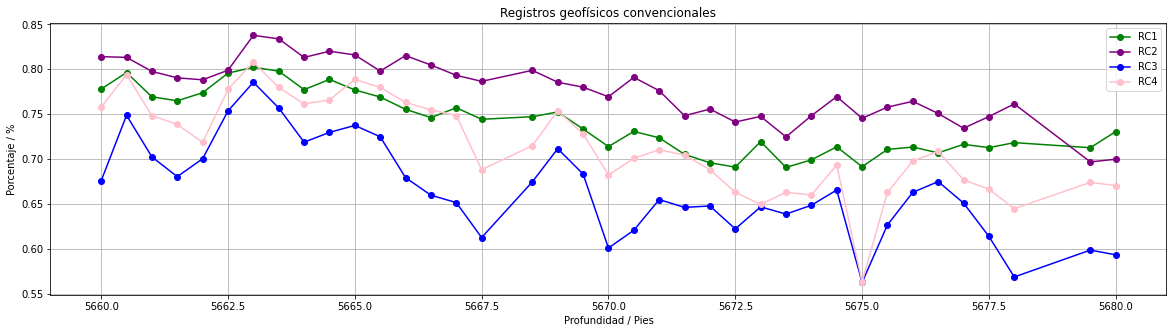

In [5]:
plt.figure(figsize=(20,5))
plt.plot(RGeofisicos['Profundidad'],RGeofisicos['RC1'],color='green',marker='o',label='RC1')
plt.plot(RGeofisicos['Profundidad'],RGeofisicos['RC2'],color='purple',marker='o',label='RC2')
plt.plot(RGeofisicos['Profundidad'],RGeofisicos['RC3'],color='blue',marker='o',label='RC3')
plt.plot(RGeofisicos['Profundidad'],RGeofisicos['RC4'],color='pink',marker='o',label='RC4')
plt.xlabel('Profundidad / Pies')
plt.ylabel('Porcentaje / %')
plt.title('Registros geofísicos convencionales')
plt.grid(True)
plt.legend()
plt.show()

## 3) Aplicación del algoritmo

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, max_error, r2_score

### **Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)**

In [7]:
X_train = np.array(RGeofisicos[['Profundidad','RC1','RC2','RC3']]) # Separamos las variables predictoras
pd.DataFrame(X_train)

,0,1,2,3
0,5660.0,0.777924,0.814029,0.675698
1,5660.5,0.796239,0.813167,0.748670
2,5661.0,0.769231,0.797562,0.702285
3,5661.5,0.764774,0.790365,0.680289
4,5662.0,0.773813,0.788184,0.700248
5,5662.5,0.795627,0.798850,0.753472
6,5663.0,0.802155,0.837717,0.785441
7,5663.5,0.797878,0.833851,0.756847
8,5664.0,0.777206,0.813117,0.718713
9,5664.5,0.788604,0.820041,0.729582


In [8]:
Y_train = np.array(RGeofisicos['RC4']) # Separamos la variable a pronosticar
pd.DataFrame(Y_train)

,0
0,0.757842
1,0.793872
2,0.748362
3,0.738451
4,0.718462
5,0.777537
6,0.807957
7,0.779641
8,0.761454
9,0.765600


### Se entrena el modelo a través de una regresión lineal múltiple

In [9]:
RLMultiple = linear_model.LinearRegression()
RLMultiple.fit(X_train,Y_train) # Se entrena el modelo

#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

### Se genera el pronóstico

In [10]:
Y_pronostico = RLMultiple.predict(X_train)
pd.DataFrame(Y_pronostico)

,0
0,0.747294
1,0.792029
2,0.752073
3,0.737382
4,0.751189
5,0.790661
6,0.818408
7,0.801339
8,0.767461
9,0.780089


### Valores pronosticados

In [11]:
RGeofisicos['Pronostico'] = Y_pronostico
RGeofisicos

,Profundidad,RC1,RC2,RC3,RC4,Pronostico
0,5660.0,0.777924,0.814029,0.675698,0.757842,0.747294
1,5660.5,0.796239,0.813167,0.748670,0.793872,0.792029
2,5661.0,0.769231,0.797562,0.702285,0.748362,0.752073
3,5661.5,0.764774,0.790365,0.680289,0.738451,0.737382
4,5662.0,0.773813,0.788184,0.700248,0.718462,0.751189
5,5662.5,0.795627,0.798850,0.753472,0.777537,0.790661
6,5663.0,0.802155,0.837717,0.785441,0.807957,0.818408
7,5663.5,0.797878,0.833851,0.756847,0.779641,0.801339
8,5664.0,0.777206,0.813117,0.718713,0.761454,0.767461
9,5664.5,0.788604,0.820041,0.729582,0.765600,0.780089


## 4) Obtención de los coeficientes, intercepto, error y Score

In [17]:
print('Coeficientes: \n',RLMultiple.coef_)
print('Intercepto: \n',RLMultiple.intercept_)
print('Residuo: %.4f' % max_error(Y_train,Y_pronostico))
print('MSE: %.4f' % mean_squared_error(Y_train,Y_pronostico))
print('RMSE: %.4f' % mean_squared_error(Y_train,Y_pronostico,squared=False)) #True devuelve MSE y False devuelve RMSE
print('Score (Bondad de ajuste): %.4f' % r2_score(Y_train,Y_pronostico))

Coeficientes: 
 [-7.50589329e-05  5.06619053e-01  2.27471256e-01  4.89091335e-01]
Intercepto: 
 0.26237021738651867
Residuo: 0.0684
MSE: 0.0004
RMSE: 0.0195
Score (Bondad de ajuste): 0.8581


## 5) Conformación del modelo de pronóstico

Y = 0.2624 − 0.000075 Profundidad + 0.5066 RC1 + 0.2275(RC2) + 0.4891(RC3) + 0.0684

* Se tiene un Score de 0.8581, el cual indica que el pronóstico de la saturación de aceite remanente (SOR), en un determinado nivel de profundidad, se logrará con un 85.81% de efectividad (grado de intensidad). Por ende, podemos concluir que el este pronóstico es muy útil. En este campo, el porcentaje de efectividad es muy alto. 
* Además, los pronósticos del modelo final se alejan en promedio 0.0004 y 0.0195 unidades del valor real, esto es, MSE y RMSE, respectivamente.

## 6) Proyección de los valores reales y pronosticados

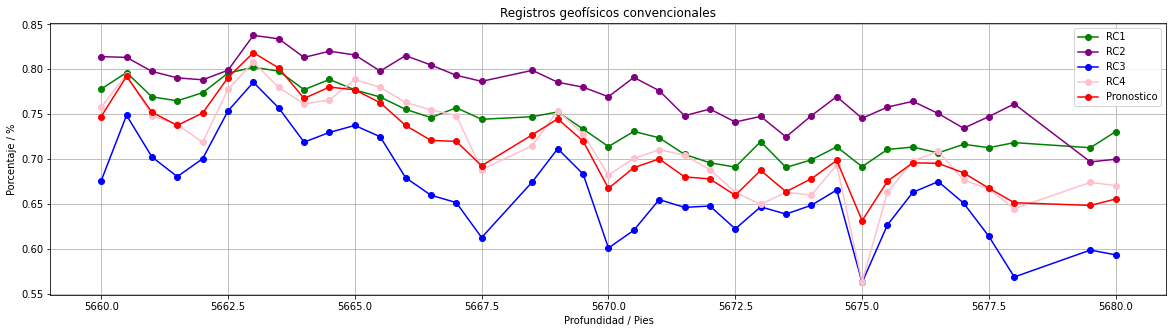

In [13]:
plt.figure(figsize=(20,5))
plt.plot(RGeofisicos['Profundidad'],RGeofisicos['RC1'],color='green',marker='o',label='RC1')
plt.plot(RGeofisicos['Profundidad'],RGeofisicos['RC2'],color='purple',marker='o',label='RC2')
plt.plot(RGeofisicos['Profundidad'],RGeofisicos['RC3'],color='blue',marker='o',label='RC3')
plt.plot(RGeofisicos['Profundidad'],RGeofisicos['RC4'],color='pink',marker='o',label='RC4')
plt.plot(RGeofisicos['Profundidad'],Y_pronostico,color='red',marker='o',label='Pronostico')
plt.xlabel('Profundidad / Pies')
plt.ylabel('Porcentaje / %')
plt.title('Registros geofísicos convencionales')
plt.grid(True)
plt.legend()
plt.show()

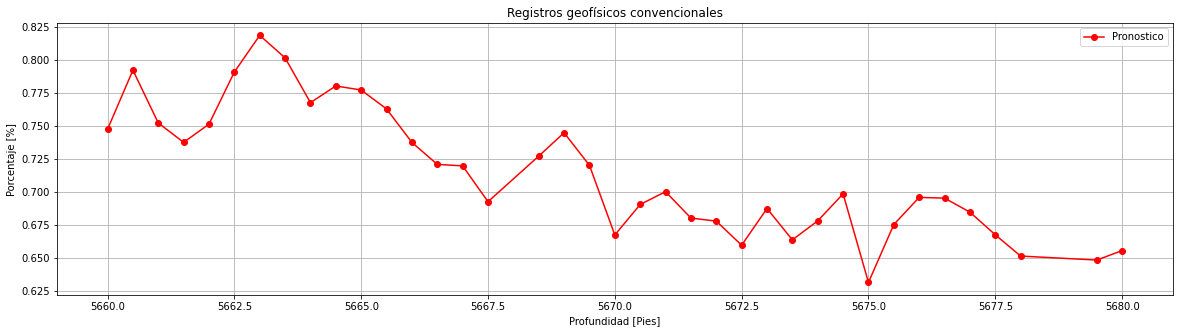

In [14]:
plt.figure(figsize=(20,5))
plt.plot(RGeofisicos['Profundidad'],Y_pronostico,color='red',marker='o',label='Pronostico')
plt.xlabel('Profundidad [Pies]')
plt.ylabel('Porcentaje [%]')
plt.title('Registros geofísicos convencionales')
plt.grid(True)
plt.legend()
plt.show()

## 7) Nuevos pronósticos

### Pronóstico sin el residuo

In [15]:
ROS = pd.DataFrame({'Profundidad': [5680.5], 'RC1': [0.45], 'RC2': [0.64], 'RC3': [0.5]})
RLMultiple.predict(ROS)

C:\Users\johnc\anaconda3\envs\DeepLearning\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([0.45410379])